In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from chissl import chissl_mongo as cm
%load_ext autoreload
%autoreload 2

In [6]:
#!pip install python-mnist

  Created wheel for python-mnist: filename=python_mnist-0.6-py2.py3-none-any.whl size=11664 sha256=ecbe681aca855875ad1e897072f16d1c458567b4de4b9529d693adf8d6f61a39
  Stored in directory: C:\Users\gabri\AppData\Local\pip\Cache\wheels\28\29\36\408f83545a511c43d03ef997a1dc99b49ccd5f9f306ed92468
Successfully built python-mnist


In [4]:
from mnist.loader import MNIST
mndata = MNIST('G:/My Drive/gabrielfair@gmail.com/DocsOnGfair@uncc/School/UNCC/PhD/5122_Visual_Analytics_with_Ryan/FinalProject/MNIST/', gz=True)
images, labels = mndata.load_training()

#Data is located: http://yann.lecun.com/exdb/mnist/

In [5]:
df = pd.DataFrame({
    'features': images,
    'ground truth': labels,
    '_id': np.arange(len(images)).astype('str')
})

df.head()

,features,ground truth,_id
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,4


In [11]:
from chissl import image
from PIL import Image

df['src'] = df.features\
    .apply(lambda x: 255 - np.reshape(x, (28, 28)).astype(np.uint8))\
    .apply(Image.fromarray, mode='L')\
    .apply(Image.Image.resize,
           size=(75, 75),
           resample=Image.BICUBIC)\
    .apply(image.img2base64)

df.head()

,features,ground truth,_id,src
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,1,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,2,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,3,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9,4,"{'type': 'image/png', 'data': 'iVBORw0KGgoAAAA..."


In [9]:
chissl = cm.ChisslMongo(verbose=True)

chissl.create_collection('MNIST', df.to_dict(orient='records'), drop=True)

In [10]:
chissl.create_application('MNIST',
                          'MNIST',
                          'ImageComponent',
                          'chissl.pipelines.mnist.SimplePipeline',
                          drop=True)

{'_id': 'MNIST',
 'collection': 'MNIST',
 'component': 'ImageComponent',
 'pipeline': 'chissl.pipelines.mnist.SimplePipeline',
 'props': {},
 'params': {}}

In [12]:
obj = chissl.create_model('MNIST', 'test', drop=True)

Finding application <MNIST>...OK
Querying collection <MNIST> <None>...found 60000...OK
Transforming data...Pipeline(memory=None,
         steps=[('extract',
                 <chissl.pipelines.mnist.JSONFeatureExtractor object at 0x000001B8BFF3E2B0>),
                ('nmf',
                 NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0,
                     max_iter=200, n_components=30, random_state=None,
                     shuffle=False, solver='cd', tol=0.0001, verbose=0))],
         verbose=False)...

C:\Users\gabri\Anaconda3\lib\site-packages\umap\rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Invalid use of recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001B8FFE0FEA0>))) with parameters (array(float32, 2d, C), array(int64, 1d, C), array(int64, 1d, C), int64)
No type info available for recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001B8FFE0FEA0>))) as a callable.
[1] During: resolving callee type: recursive(type(CPUDispatcher(<function make_euclidean_tree at 0x000001B8FFE0FEA0>)))
[2] During: typing of call at C:\Users\gabri\Anaconda3\lib\site-packages\umap\rp_tree.py (457)


File "..\..\..\..\..\..\..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_siz

OK
Clustering data...OK
done.


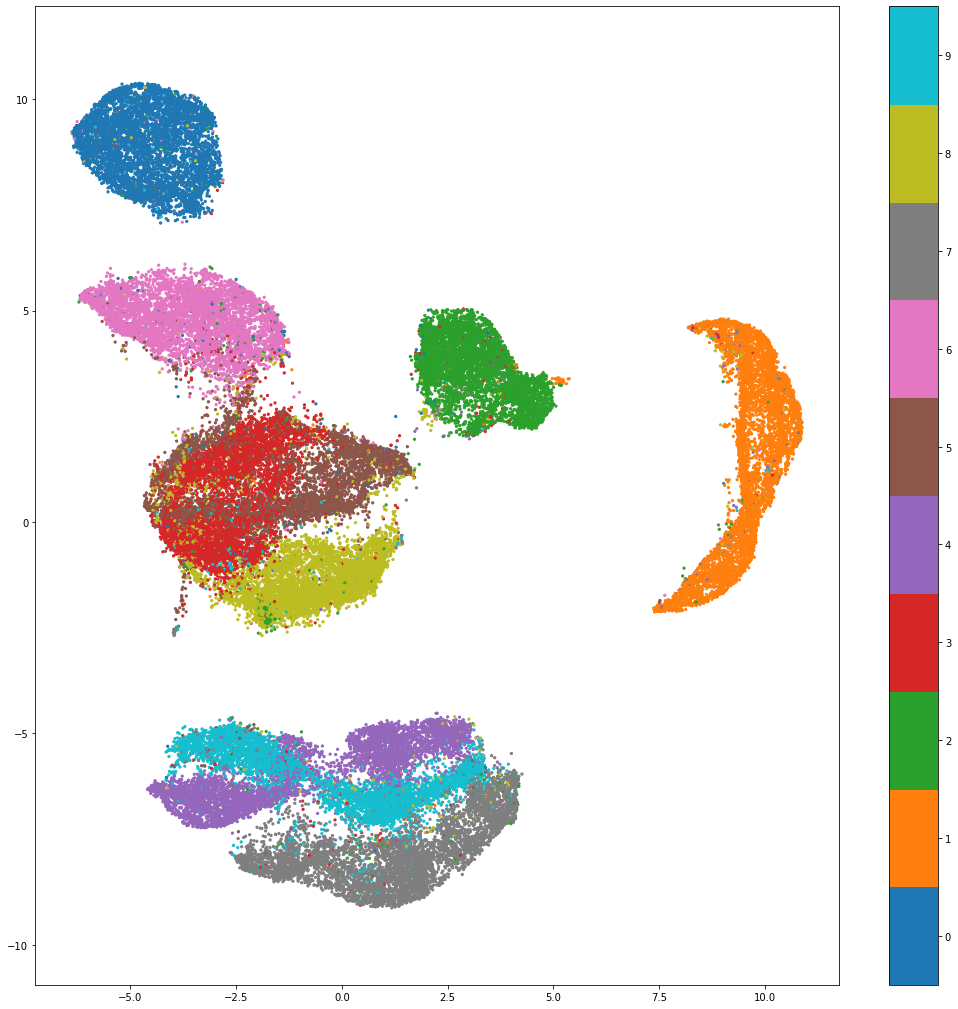

In [13]:
plt.figure(figsize=(18, 18))

plt.scatter(*np.array(obj['X']).T, s=5, c=labels, cmap='tab10', vmax=10)
plt.axis('equal')
cb = plt.colorbar()
cb.set_ticks(np.arange(10) + .5)
cb.set_ticklabels(np.arange(10).astype('str'))